In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



data = pd.read_csv('train.csv', encoding = "ISO-8859-1") # importing training data
data.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [12]:
data3 = pd.DataFrame()
data1 = data[data['label'] == 1]
data0 = data[data['label'] == 0]
frames = [data1.head(2242), data0.head(12758)]
data3 = pd.concat(frames)
data3 = data3.sample(frac = 1)
data3
df1=data3

In [13]:
df1.isna().sum()

id       0
label    0
tweet    0
dtype: int64

In [14]:
print(len(df1[df1.label == 0]), 'Non-Hatred Tweets')
print(len(df1[df1.label == 1]), 'Hatred Tweets')

12758 Non-Hatred Tweets
2242 Hatred Tweets


In [15]:
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
lemma = WordNetLemmatizer()
from wordcloud import WordCloud, STOPWORDS
from nltk import FreqDist
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression #classification model
from sklearn.metrics import confusion_matrix, classification_report, f1_score

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
def normalizer(tweet):
    tweets = " ".join(filter(lambda x: x[0]!= '@' , tweet.split()))
    tweets = re.sub('[^a-zA-Z]', ' ', tweets)
    tweets = tweets.lower()
    tweets = tweets.split()
    tweets = [word for word in tweets if not word in set(stopwords.words('english'))]
    tweets = [lemma.lemmatize(word) for word in tweets]
    tweets = " ".join(tweets)
    return tweets

df1['normalized_text'] = df1.tweet.apply(normalizer)
df1.head()

,id,label,tweet,normalized_text
1687,1688,0,3 hours to go until our music video is release...,hour go music video released music edinburgh s...
3327,3328,0,orlando massacre: what we need to say - grazia,orlando massacre need say grazia
6495,6496,0,looks like #canadians #cared more abt #america...,look like canadian cared abt american slaughte...
3271,3272,0,@user @user @user nobody helping since days fo...,nobody helping since day complaint ref nothing...
20915,20916,1,"#newyear 'wish list' of cretin #carlpaladino,...",newyear wish list cretin carlpaladino election...


In [17]:
df1=df1.reset_index()
df1

,index,id,label,tweet,normalized_text
0,1687,1688,0,3 hours to go until our music video is release...,hour go music video released music edinburgh s...
1,3327,3328,0,orlando massacre: what we need to say - grazia,orlando massacre need say grazia
2,6495,6496,0,looks like #canadians #cared more abt #america...,look like canadian cared abt american slaughte...
3,3271,3272,0,@user @user @user nobody helping since days fo...,nobody helping since day complaint ref nothing...
4,20915,20916,1,"#newyear 'wish list' of cretin #carlpaladino,...",newyear wish list cretin carlpaladino election...
...,...,...,...,...,...
14995,11412,11413,0,@user it's #bihdaybash in #atlanta we love to...,bihdaybash atlanta love see lady newhair get f...
14996,23330,23331,1,"#sunbury, #pennsylvania : fliers posted outsi...",sunbury pennsylvania flier posted outside mosq...
14997,11597,11598,0,thx you for gift... my best friend #flower #sh...,thx gift best friend flower shoe adidad bff bd...
14998,6540,6541,0,@user thanks. i will. just called mohammed on ...,thanks called mohammed helpline amazing proble...


In [18]:
print(len(df1))
corpus = []
for i in range(0,15000):
    corpus.append(df1['normalized_text'][i])
cv = CountVectorizer(stop_words=stopwords.words('english'))
cv.fit(corpus)

15000


CountVectorizer(stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...])

In [19]:
X = cv.transform(corpus).toarray()
y = df1.iloc[:,2].values
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [20]:
X.shape

(15000, 21760)

In [21]:
y = pd.get_dummies(y, columns = ['1', '0'])

In [22]:
count=0
for i in range (0,15000):
  if y[0][i]:
    count+=1
count
# y

12758

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape

(12000, 21760)

In [24]:

from keras.models import Sequential
from keras.layers import Dense, Activation

model = Sequential()
model.add(Dense(64, activation='relu', input_shape = (21760,) ))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split = .2)

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1392704   
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 8)                 136       
                                                                 
 dense_4 (Dense)             (None, 2)                 18        
                                                                 
Total params: 1,395,466
Trainable params: 1,395,466
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.fit(X_train, y_train, epochs=5, batch_size=128, validation_split = .2)

Epoch 1/5
75/75 [==============================] - 9s 101ms/step - loss: 0.6109 - accuracy: 0.8402 - val_loss: 0.4180 - val_accuracy: 0.8767
Epoch 2/5
75/75 [==============================] - 4s 50ms/step - loss: 0.2242 - accuracy: 0.9343 - val_loss: 0.2034 - val_accuracy: 0.9329
Epoch 3/5
75/75 [==============================] - 5s 62ms/step - loss: 0.0683 - accuracy: 0.9796 - val_loss: 0.2166 - val_accuracy: 0.9304
Epoch 4/5
75/75 [==============================] - 4s 52ms/step - loss: 0.0281 - accuracy: 0.9919 - val_loss: 0.2396 - val_accuracy: 0.9346
Epoch 5/5
75/75 [==============================] - 4s 51ms/step - loss: 0.0133 - accuracy: 0.9960 - val_loss: 0.2766 - val_accuracy: 0.9321


In [27]:
df1 = pd.read_csv('train.csv', encoding = "ISO-8859-1") 
df1.head()
df1=df1[20000:25000]
df1.shape
df1.isna().sum()
df1=df1.reset_index()
df1

,index,id,label,tweet
0,20000,20001,0,finally caught up with the 21st century and si...
1,20001,20002,0,@user if we could get on the bus we would leav...
2,20002,20003,0,@user leaving day at ih belfast! #ihbelfas...
3,20003,20004,0,happy sunday everybody! #sunday #bymodels ...
4,20004,20005,0,getting our puppy today #3become4 #dory
...,...,...,...,...
4995,24995,24996,0,"if you have any #questions, give us a #call, w..."
4996,24996,24997,0,"last day of school! practice today, game tomor..."
4997,24997,24998,0,go have a listen to my new song being released...
4998,24998,24999,0,bad day. all my 'friends' were being very mean...


In [28]:
df1['normalized_text'] = df1.tweet.apply(normalizer)
corpus=[]
for i in range(0,5000):
    corpus.append(df1['normalized_text'][i])

In [31]:
X = cv.transform(corpus).toarray()
y = df1.iloc[:,2].values
y = pd.get_dummies(y, columns = ['1', '0'])

In [32]:
X.shape
y.shape
# np.unique(y)

(5000, 2)

In [33]:
sol = model.predict(X)

157/157 [==============================] - 1s 7ms/step


In [34]:
count=[]
for i in range(0,5000):
  count.append(np.argmax(sol[i]))
print(count)


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 

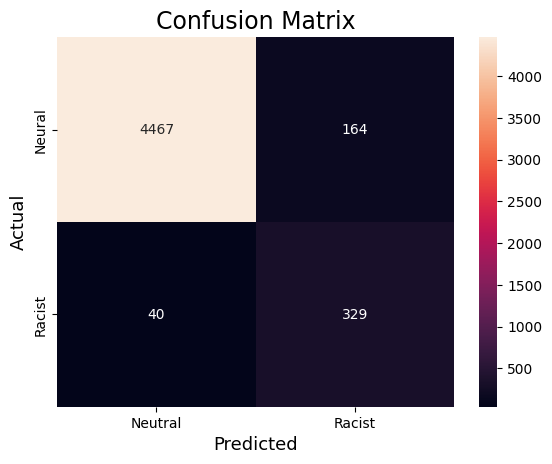

Accuracy   : 0.9592
Precision : 0.6673427991886409
Recall    : 0.8915989159891599
F1-score  : 0.7633410672853828


In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

cm=confusion_matrix(df1.iloc[:,2].values, count)


sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Neutral','Racist'],
            yticklabels=['Neural','Racist'])
plt.ylabel('Actual',fontsize=13)
plt.xlabel('Predicted',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

y_test=df1.iloc[:,2].values
y_pred=count
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy   :", accuracy)
precision = precision_score(y_test, y_pred)
print("Precision :", precision)
recall = recall_score(y_test, y_pred)
print("Recall    :", recall)
F1_score = f1_score(y_test, y_pred)
print("F1-score  :", F1_score)


# BERT

In [1]:
import pandas as pd
data = pd.read_csv('train.csv')
data.head()
type(data)

pandas.core.frame.DataFrame

In [2]:
data3 = pd.DataFrame()
data1 = data[data['label'] == 1]
data0 = data[data['label'] == 0]
frames = [data1.head(500), data0.head(500)]
data3 = pd.concat(frames)
data3 = data3.sample(frac = 1)
data3

,id,label,tweet
333,334,0,#juneteenth #independenceday #food4thought #...
5950,5951,1,how is it that a man comes in last in a race b...
68,69,1,ð©the white establishment can't have blk fol...
1751,1752,1,@user no liberal believes that. we are the pay...
3542,3543,1,@user how is the word #love even in your vocab...
...,...,...,...
6741,6742,1,#2017 scatter #joy!â¢ may we bless&amp;keep s...
933,934,1,is not an #opinion. racism is #degrading peop...
544,545,1,@user that doesn't prevent you from being a a...
5314,5315,1,j.c penney employee holds customer in headlock...


In [3]:
data=data3

In [4]:
data.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

In [5]:
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
lemma = WordNetLemmatizer()

def normalizer(tweet):
    tweets = " ".join(filter(lambda x: x[0]!= '@' , tweet.split()))
    tweets = re.sub('[^a-zA-Z]', ' ', tweets)
    tweets = tweets.lower()
    tweets = tweets.split()
    tweets = [word for word in tweets if not word in set(stopwords.words('english'))]
    tweets = [lemma.lemmatize(word) for word in tweets]
    tweets = " ".join(tweets)
    return tweets

data['normalized_text'] = data.tweet.apply(normalizer)


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
all_words = " ".join(data.normalized_text)
hatred_words = " ".join(data[data['label']==1].normalized_text)

In [7]:
# !pip install tensorflow_hub
# !pip install tensorflow_text
import tensorflow_hub as hub
import tensorflow_text as text

In [8]:
preprocess_url = "https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3"
encoder_url = "https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4"
bert_preprocess_model = hub.KerasLayer(preprocess_url)
text_test = data['normalized_text'].tolist()
text_preprocessed = bert_preprocess_model(text_test)

In [ ]:
#@title Default title text
bert_model = hub.KerasLayer(encoder_url)
bert_results = bert_model(text_preprocessed)
bert_results.keys()
df = bert_results['pooled_output']

In [135]:
df

<tf.Tensor: shape=(1000, 768), dtype=float32, numpy=
array([[-0.70360804, -0.50008583, -0.887749  , ..., -0.60607076,
        -0.6118873 ,  0.82192904],
       [-0.86051625, -0.26906678, -0.04890202, ..., -0.11236896,
        -0.5919704 ,  0.9028509 ],
       [-0.8618153 , -0.5575933 , -0.89502233, ..., -0.7816628 ,
        -0.6873987 ,  0.75592154],
       ...,
       [-0.8074286 , -0.28539616, -0.5312113 , ..., -0.16566284,
        -0.6382496 ,  0.8731795 ],
       [-0.8125496 , -0.20383257,  0.13648306, ...,  0.4233455 ,
        -0.49789438,  0.83963215],
       [-0.8286274 , -0.4866653 , -0.8842746 , ..., -0.7000617 ,
        -0.6640267 ,  0.8733993 ]], dtype=float32)>

In [136]:
# import numpy as np
y= data.iloc[:,1].values
y = pd.get_dummies(y, columns = ['1', '0'])
a = df.numpy()
df1 = pd.Series(a.tolist())

In [137]:
df1

0      [-0.7036080360412598, -0.5000858306884766, -0....
1      [-0.8605162501335144, -0.26906678080558777, -0...
2      [-0.8618152737617493, -0.5575932860374451, -0....
3      [-0.8339090347290039, -0.4172326326370239, -0....
4      [-0.8820518851280212, -0.35343751311302185, -0...
                             ...                        
995    [-0.9385372996330261, -0.615025520324707, -0.8...
996    [-0.8290014266967773, -0.4178866446018219, -0....
997    [-0.8074285984039307, -0.28539615869522095, -0...
998    [-0.8125495910644531, -0.20383256673812866, 0....
999    [-0.8286274075508118, -0.4866653084754944, -0....
Length: 1000, dtype: object

In [138]:
from keras.models import Sequential
from keras.layers import Dense, Activation

model = Sequential()
model.add(Dense(64, activation='relu', input_shape = (768,) ))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [140]:
model.fit(df, y, epochs=100, batch_size=16, validation_split = .2)

Epoch 1/100
50/50 [==============================] - 1s 6ms/step - loss: 0.5323 - accuracy: 0.7400 - val_loss: 0.6682 - val_accuracy: 0.5850
Epoch 2/100
50/50 [==============================] - 0s 5ms/step - loss: 0.5040 - accuracy: 0.7538 - val_loss: 0.4688 - val_accuracy: 0.8200
Epoch 3/100
50/50 [==============================] - 0s 5ms/step - loss: 0.4766 - accuracy: 0.7738 - val_loss: 0.4296 - val_accuracy: 0.8100
Epoch 4/100
50/50 [==============================] - 0s 6ms/step - loss: 0.4700 - accuracy: 0.7825 - val_loss: 0.4436 - val_accuracy: 0.8150
Epoch 5/100
50/50 [==============================] - 0s 6ms/step - loss: 0.4703 - accuracy: 0.7912 - val_loss: 0.4240 - val_accuracy: 0.8150
Epoch 6/100
50/50 [==============================] - 0s 5ms/step - loss: 0.4426 - accuracy: 0.7900 - val_loss: 0.4293 - val_accuracy: 0.8100
Epoch 7/100
50/50 [==============================] - 0s 6ms/step - loss: 0.4405 - accuracy: 0.8050 - val_loss: 0.4471 - val_accuracy: 0.8000
Epoch 8/100
5

In [141]:
data = pd.read_csv('train.csv', encoding = "ISO-8859-1") # importing training data
data.head()
data=data[2000:2500]
data.shape
data.isna().sum()

id       0
label    0
tweet    0
dtype: int64

In [142]:
data['normalized_text'] = data.tweet.apply(normalizer)

In [143]:
preprocess_url = "https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3"
encoder_url = "https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4"
bert_preprocess_model = hub.KerasLayer(preprocess_url)
text_test = data['normalized_text'].tolist()
text_preprocessed = bert_preprocess_model(text_test)
bert_model = hub.KerasLayer(encoder_url)
bert_results = bert_model(text_preprocessed)
bert_results.keys()
df = bert_results['pooled_output']

In [144]:
a = df.numpy()
df1 = pd.Series(a.tolist())

In [145]:
y= data.iloc[:,1].values
y = pd.get_dummies(y, columns = ['1', '0'])

In [146]:
sol = model.predict(df)

16/16 [==============================] - 0s 2ms/step


In [147]:
sol

array([[9.98063266e-01, 1.93677039e-03],
       [3.05071235e-01, 6.94928765e-01],
       [9.92503047e-01, 7.49696558e-03],
       [9.88847017e-01, 1.11529771e-02],
       [3.00769024e-02, 9.69923139e-01],
       [3.83659778e-03, 9.96163368e-01],
       [5.90531886e-01, 4.09468174e-01],
       [1.37029225e-02, 9.86297131e-01],
       [9.99550402e-01, 4.49555984e-04],
       [8.52378786e-01, 1.47621244e-01],
       [9.96448398e-01, 3.55156721e-03],
       [9.99750555e-01, 2.49386299e-04],
       [4.98083245e-04, 9.99501944e-01],
       [6.89141825e-02, 9.31085765e-01],
       [6.75140400e-05, 9.99932528e-01],
       [9.94383454e-01, 5.61650377e-03],
       [9.99880552e-01, 1.19407363e-04],
       [3.08009051e-02, 9.69199061e-01],
       [1.73769004e-04, 9.99826252e-01],
       [9.99778926e-01, 2.21039430e-04],
       [8.19459915e-01, 1.80540100e-01],
       [8.76299083e-01, 1.23700924e-01],
       [9.99873638e-01, 1.26302955e-04],
       [1.47935236e-03, 9.98520672e-01],
       [9.906409

In [148]:
count=[]
for i in range(0,500):
  count.append(np.argmax(sol[i]))
print(count)

[0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 

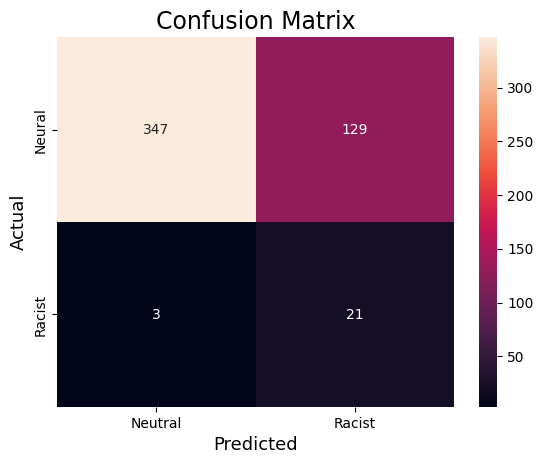

Accuracy   : 0.736
Precision : 0.14
Recall    : 0.875
F1-score  : 0.24137931034482757


In [149]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

cm=confusion_matrix(data.iloc[:,1].values, count)


sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Neutral','Racist'],
            yticklabels=['Neural','Racist'])
plt.ylabel('Actual',fontsize=13)
plt.xlabel('Predicted',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

y_test=data.iloc[:,1].values
y_pred=count
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy   :", accuracy)
precision = precision_score(y_test, y_pred)
print("Precision :", precision)
recall = recall_score(y_test, y_pred)
print("Recall    :", recall)
F1_score = f1_score(y_test, y_pred)
print("F1-score  :", F1_score)
